# Machine Learning Exam
## Roll No.220940325075

## Problem Statement 
To understand the factors affecting the pricing of cars in the American market

## Business Objective

To Manipulate the design of the cars, the business strategy etc. to meet certain price levels.


### In this Notebook following steps are followed :
- Data understanding and exploration
- Data cleaning
- Data preparation
- Model building and evaluation
- Error calculation
- Conclusion

# Problem Statement 1

In [1]:
# importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score

In [2]:
df=pd.read_csv('car.csv')

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


## Understanding and Cleaning the data

In [4]:
df.shape

(301, 9)

In [5]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

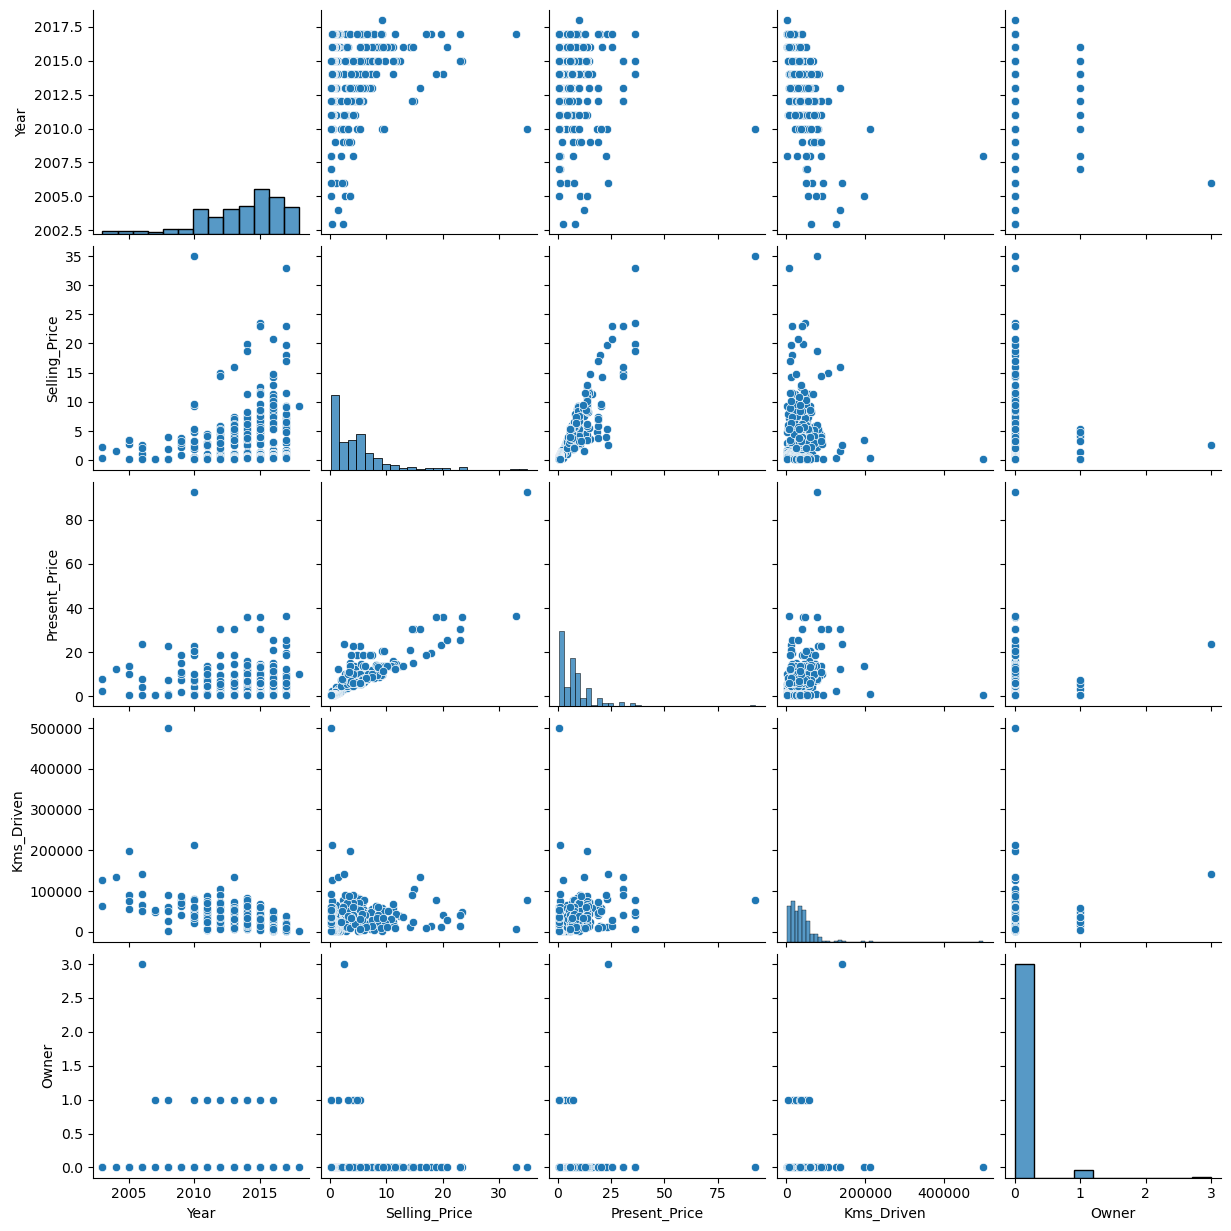

In [8]:
# Pairplot or scatter plot gives relationship between multiple variables in dataset
sns.pairplot(df)

## Data Preparation

In [9]:
print(df['Fuel_Type'].value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64


In [10]:
df.replace({'CNG':0,'Petrol':1,'Diesel':2},inplace=True)

In [11]:
print(df['Seller_Type'].value_counts())

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64


In [12]:
df.replace({'Dealer':0,'Individual':1},inplace=True)

In [13]:
print(df['Transmission'].value_counts())

Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [14]:
df.replace({'Manual':0,'Automatic':1},inplace=True)

In [15]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,1,0,0,0
1,sx4,2013,4.75,9.54,43000,2,0,0,0
2,ciaz,2017,7.25,9.85,6900,1,0,0,0
3,wagon r,2011,2.85,4.15,5200,1,0,0,0
4,swift,2014,4.60,6.87,42450,2,0,0,0


## Splitting Data into Train Test set

In [16]:
X = df.drop(['Car_Name','Selling_Price'],axis=1)
y= df['Selling_Price']

In [17]:
X.shape, y.shape

((301, 7), (301,))

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

## Model Building

## Multiple Linear Regression

In [19]:
model= LinearRegression()

In [20]:
model.fit(X_train,y_train)

LinearRegression()

In [21]:
y_pred=model.predict(X_test)
y_pred

array([ 7.46207579, -0.38578468,  4.29574487,  8.9503368 , 14.36799192,
        4.90907369,  3.54853741,  1.44539297,  5.37727666,  4.65795834,
        2.30287051,  1.61941493,  5.09074494,  7.59349087,  8.55013343,
       14.033509  ,  7.36127855,  4.27355086, -0.4334414 ,  2.36989615,
        5.02362942,  3.85293598,  6.46818245,  8.06951746, -1.8925963 ,
        1.92934818, -0.81483783,  0.82112849,  0.02636546,  7.14229408,
        3.49369633,  7.37197758,  0.72237106,  7.87355078,  3.56293874,
        1.80557914,  5.58662717,  6.9271033 , -2.64267825,  9.03542601,
        9.15198739, 19.9836083 ,  4.41638617,  3.88704315,  6.60315189,
        9.79387519,  0.13331737,  1.68061282,  5.14718683,  7.29133885,
        8.10755623,  4.20935611,  4.89754175, 20.33161109,  1.74999784,
        1.30549675,  0.3054981 ,  2.02409409,  3.41866712,  0.87174619,
        3.57705379])

##  Error Calculation for Multiple Linear Regression

In [22]:
mse=mean_squared_error(y_pred,y_test)
r2=r2_score(y_pred,y_test)

In [23]:
print('Mean squared error is : ',mse)
print('\nr2 score is :',r2)

Mean squared error is :  2.1588608829404614

r2 score is : 0.8922863619192811


# Model Bulding

## Random Forest Regressor

In [24]:
from sklearn.ensemble import RandomForestRegressor

In [25]:
rf= RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [26]:
y_pred1=rf.predict(X_test)

In [27]:
y_pred1


array([ 6.838 ,  0.433 ,  4.6045,  8.8165, 15.6237,  5.2105,  3.166 ,
        0.4411,  3.8815,  4.687 ,  2.813 ,  0.7581,  4.8065,  7.251 ,
        7.688 , 15.1455,  6.6972,  3.957 ,  0.4445,  1.599 ,  2.919 ,
        4.818 ,  5.161 ,  9.7392,  0.1898,  0.7268,  0.2889,  0.6688,
        0.4747,  4.176 ,  2.638 ,  5.9075,  0.4945,  7.458 ,  3.2055,
        1.1656,  5.5785,  5.3475,  0.2474,  8.247 ,  8.0288, 23.445 ,
        4.822 ,  4.4515,  5.711 , 11.3588,  0.2398,  0.7756,  5.3245,
        6.6385,  6.9066,  3.0665,  5.3565, 24.9025,  1.171 ,  1.1355,
        0.4613,  2.4545,  3.555 ,  2.543 ,  4.0265])

## Error calculation for Random Forest Regressor 

In [28]:
mseR=mean_squared_error(y_pred1,y_test)
r2R=r2_score(y_pred1,y_test)

In [29]:
print('Mean squared error is : ',mseR)
print('\nr2 score is :',r2R)

Mean squared error is :  1.0396230968852453

r2 score is : 0.9568389154965903


## Conclusion

1. Here Multiple Linear Regressiona and Random Forest Regressor model have used to find best fit.

2. In which Random Forest Regressor have given better prediction than multiple Linear Regression model.

3. Following factors affects price of the car
- Year
- Present_Price
- Kms_Driven
- Fuel_Type
- Seller_Type
- Transmission
- Owner

# Problem Statement 2

In [30]:
df1=pd.read_excel('data_final.xlsx')

In [31]:
df1.head()

,observation,feature,price
0,0.44,0.68,511.14
1,0.99,0.23,717.10
2,0.84,0.29,607.91
3,0.28,0.45,270.40
4,0.07,0.83,289.88


In [32]:
df1.shape

(100, 3)

In [33]:
df1.describe()

,observation,feature,price
count,100.000000,100.000000,100.000000
mean,0.550300,0.501700,554.214600
std,0.293841,0.307124,347.312796
min,0.010000,0.000000,42.080000
25%,0.300000,0.230000,278.172500
50%,0.570000,0.485000,514.285000
75%,0.822500,0.760000,751.752500
max,1.000000,0.990000,1563.820000


In [34]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   observation  100 non-null    float64
 1   feature      100 non-null    float64
 2   price        100 non-null    float64
dtypes: float64(3)
memory usage: 2.5 KB


In [35]:
df1.isnull().sum()

observation    0
feature        0
price          0
dtype: int64

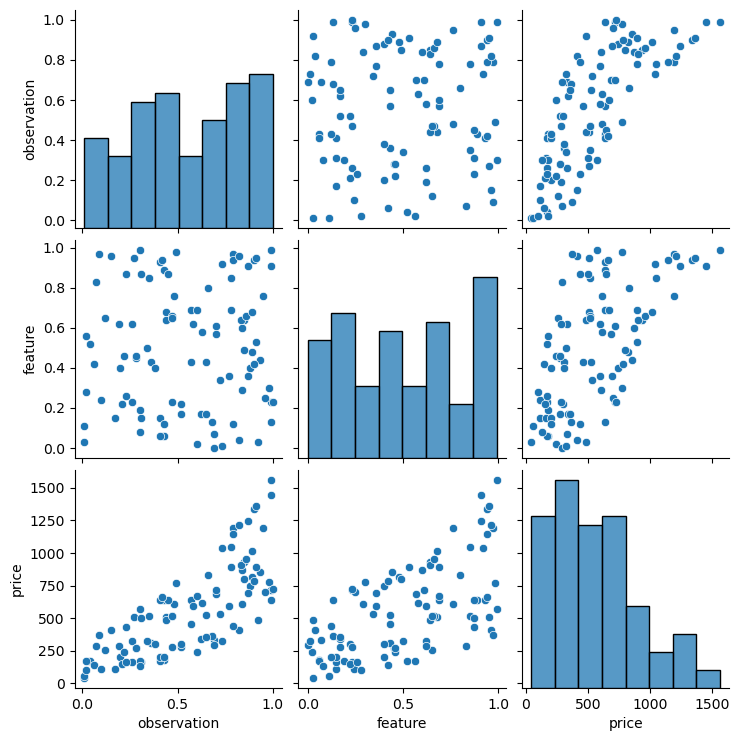

In [36]:
sns.pairplot(df1)

## Splitting Data into Train Test set


In [37]:
X=df1.iloc[:,:-1]
y=df1.iloc[:,-1]


In [38]:
X.shape, y.shape

((100, 2), (100,))

In [39]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

## Model Building

## Plynomial Regression

In [40]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg=PolynomialFeatures(degree=2)

In [41]:
X_poly=poly_reg.fit_transform(X_train)
pg=LinearRegression()
pg.fit(X_poly,y_train)

LinearRegression()

In [42]:
y_pred2=pg.predict(poly_reg.fit_transform(X_test))
y_pred2

array([ 356.97041624,  131.48679167,  612.24585213,  141.46564912,
        574.45079704,  227.7049998 ,  522.44355571,  482.69995215,
        624.72075471,  632.03897372,  705.47890319, 1028.58725282,
       1152.75931229, 1322.04882209,  460.49939796,  337.77307228,
       1046.55961454,  159.74693596,  906.45307885,  643.47703027])

## Error calculation for Polynomial Regression

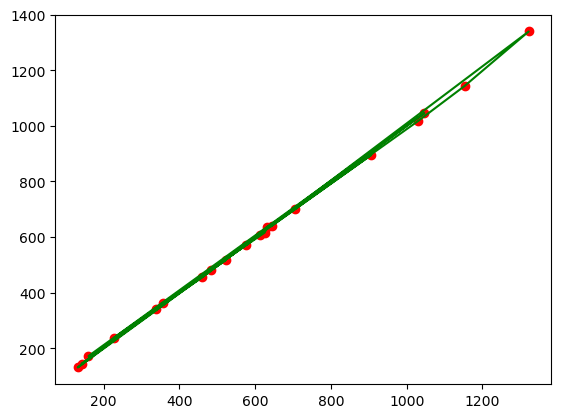

In [43]:
plt.scatter(y_pred2,y_test,color='red')
plt.plot(y_pred2,y_test,color='green')

In [44]:
mseP=mean_squared_error(y_pred2,y_test)
r2P=r2_score(y_pred2,y_test)

In [45]:

print('Mean squared error is : ',mseP)
print('\nr2 score is :',r2P)

Mean squared error is :  57.72843565622151

r2 score is : 0.9994864870769116


## Model Building

##  Decision Tree Regression

In [46]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(criterion="mse")

In [47]:
reg.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse')

In [48]:
y_pred3=reg.predict(X_test)

In [49]:
y_pred3

array([ 332.4 ,  174.59,  696.65,  174.44,  503.04,  202.76,  518.29,
        408.6 ,  522.25,  408.6 ,  717.1 ,  957.61, 1211.31, 1360.49,
        303.7 ,  276.05, 1211.31,  174.44,  819.63,  642.45])

## Error calculation for Decision Tree Regression 

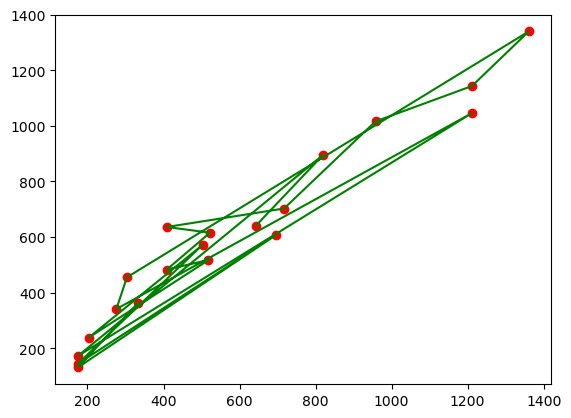

In [52]:
plt.scatter(y_pred3,y_test,color='red')
plt.plot(y_pred3,y_test,color='green')

In [50]:
mseD=mean_squared_error(y_pred3,y_test)
r2D=r2_score(y_pred3,y_test)

In [51]:
print('Mean squared error is : ',mseD)
print('\nr2 score is :',r2D)

Mean squared error is :  7633.727179999997

r2 score is : 0.9408250251330936


## Conclusion
1. In this project Polynomial Regression and Decision Tree Regression is used for prediction
2. Polynomial Regression predicted values more accurately than Decision Tree Regression.
3. Since datapoints on  Decision Tree varies more than polynomial regression is best to use.
